<a href="https://colab.research.google.com/github/smkandel/DS_project/blob/main/Olympics_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis of 120 years of Olympic History.
Data Source: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Olympic/athlete_events.csv', encoding='utf-8')

In [4]:
#print top 5 records
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In Data Analysis, our goal is to find out the following insights:
1.Missing Values
2.Numerical Variables
3.Distribution of the Numerical Variables
4.Outliers
5.Categorical Variables
6.Relationship between independent and dependent feature

1. Missing Values

In [6]:
## Here we will check the percentage of nan values present in each feature
## 1 step -make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

##2 step- print the feature name and the percentage of missing values
for features in features_with_na:
  print(features, np.round(df[features].isnull().mean(),4), '%missing values')


Age 0.0349 %missing values
Height 0.2219 %missing values
Weight 0.2319 %missing values
Medal 0.8533 %missing values


In [7]:
# Check count of null values
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [8]:
#Replace null value for Age, Height and Weight with their mean
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Height']=df['Height'].fillna(df['Height'].mean())
df['Weight']=df['Weight'].fillna(df['Weight'].mean())


In [9]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


2. Numerical Variables

In [10]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,ID,Age,Height,Weight,Year
0,1,24.0,180.00000,80.000000,1992
1,2,23.0,170.00000,60.000000,2012
2,3,24.0,175.33897,70.702393,1920
3,4,34.0,175.33897,70.702393,1900
4,5,21.0,185.00000,82.000000,1988


3. Distribution of Numerical Variables

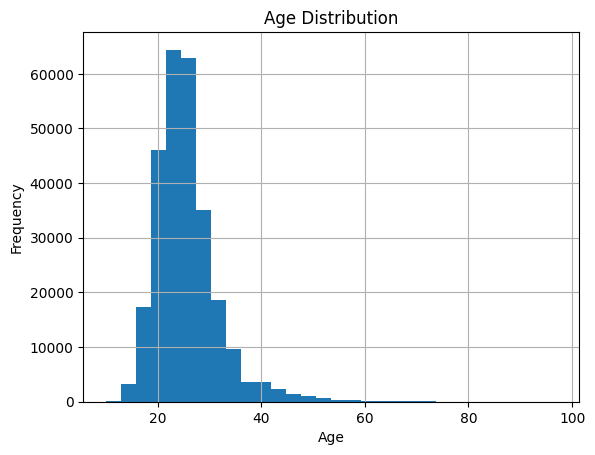

In [12]:
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


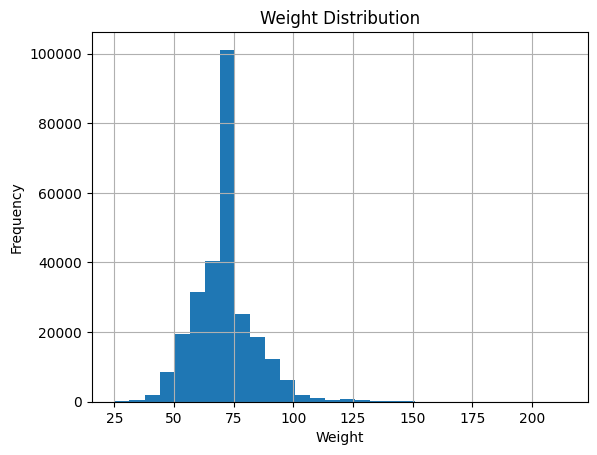

In [13]:
df['Weight'].hist(bins=30)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

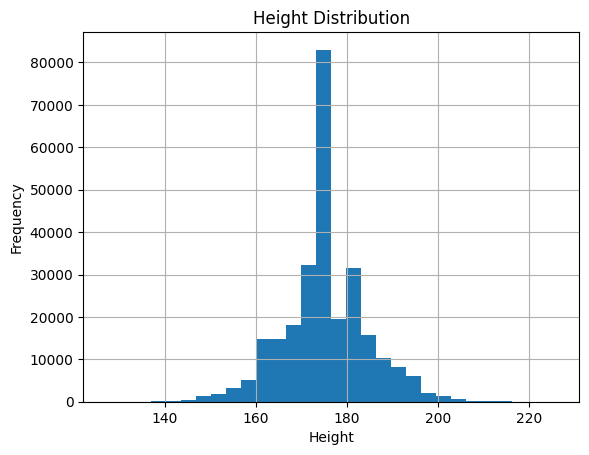

In [14]:
df['Height'].hist(bins=30)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

4. Outliers

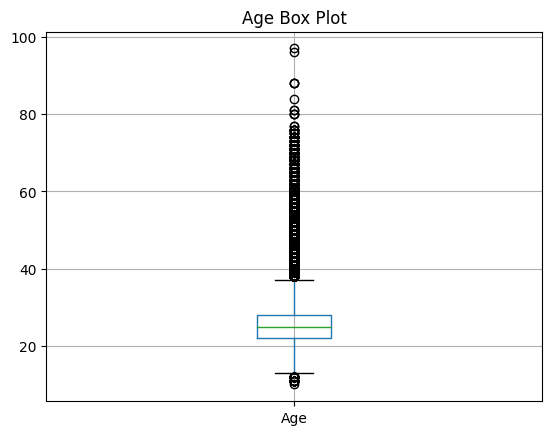

In [15]:
df.boxplot(column='Age')
plt.title('Age Box Plot')
plt.show()

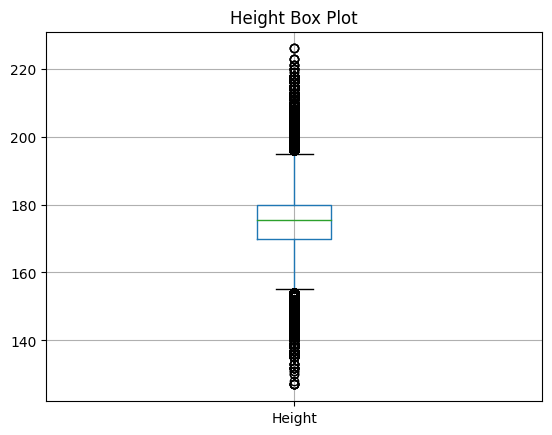

In [16]:
df.boxplot(column='Height')
plt.title('Height Box Plot')
plt.show()

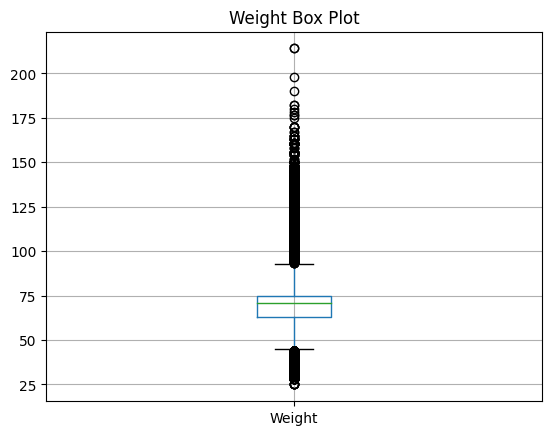

In [17]:
df.boxplot(column='Weight')
plt.title('Weight Box Plot')
plt.show()

In [18]:
#Descriptive statistics and summary
print("\nValue Counts:")
print(df['Sport'].value_counts())
print(df['Medal'].value_counts())


Value Counts:
Sport
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: count, Length: 66, dtype: int64
Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


5. Categorical Variables

In [19]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Name',
 'Sex',
 'Team',
 'NOC',
 'Games',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [20]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Name and number of categories are 134732
The feature is Sex and number of categories are 2
The feature is Team and number of categories are 1184
The feature is NOC and number of categories are 230
The feature is Games and number of categories are 51
The feature is Season and number of categories are 2
The feature is City and number of categories are 42
The feature is Sport and number of categories are 66
The feature is Event and number of categories are 765
The feature is Medal and number of categories are 4


In [21]:
print(df['Medal'].unique())

[nan 'Gold' 'Bronze' 'Silver']


In [22]:
# Impute missing values with 'No Medal'
df['Medal'].fillna('No Medal', inplace=True)

In [23]:
#Create Numeric representation for 'Medal'
#Define the mapping for Medal to numeric values
medal_mapping = {'No Medal': 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3}

# Convert 'Medal' to numeric values
df['Medal'] = df['Medal'].map(medal_mapping)

# Check conversion
print(df['Medal'].unique())


[0 3 1 2]


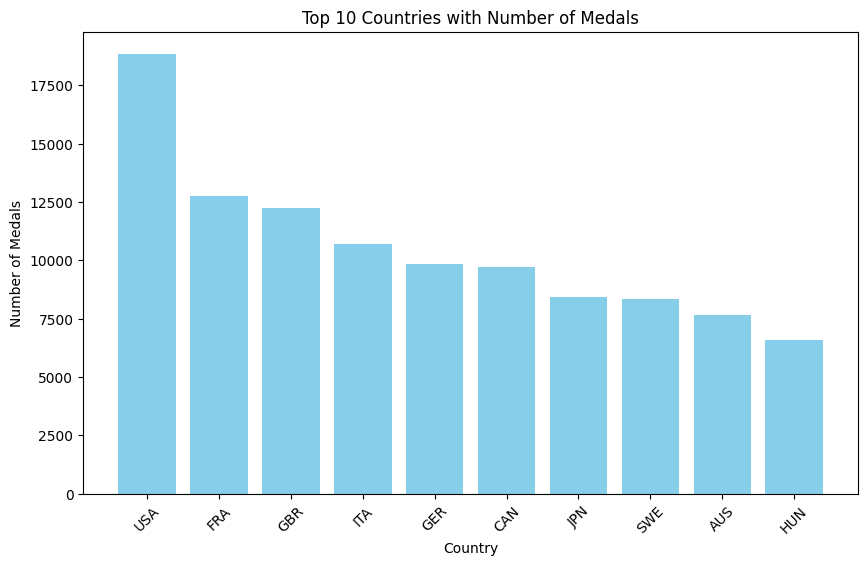

In [24]:
# Comparison of medal counts by country
medal_counts_by_country=pd.pivot_table(df,index='NOC',values='Medal',aggfunc='count')
medal_counts_by_country
medal_counts_by_country_top10=medal_counts_by_country.sort_values(by='Medal',ascending=False).head(10)
medal_counts_by_country_top10

##ploting barchart
plt.figure(figsize=(10,6))
plt.bar(medal_counts_by_country_top10.index,medal_counts_by_country_top10['Medal'], color='skyblue')
plt.title('Top 10 Countries with Number of Medals')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()

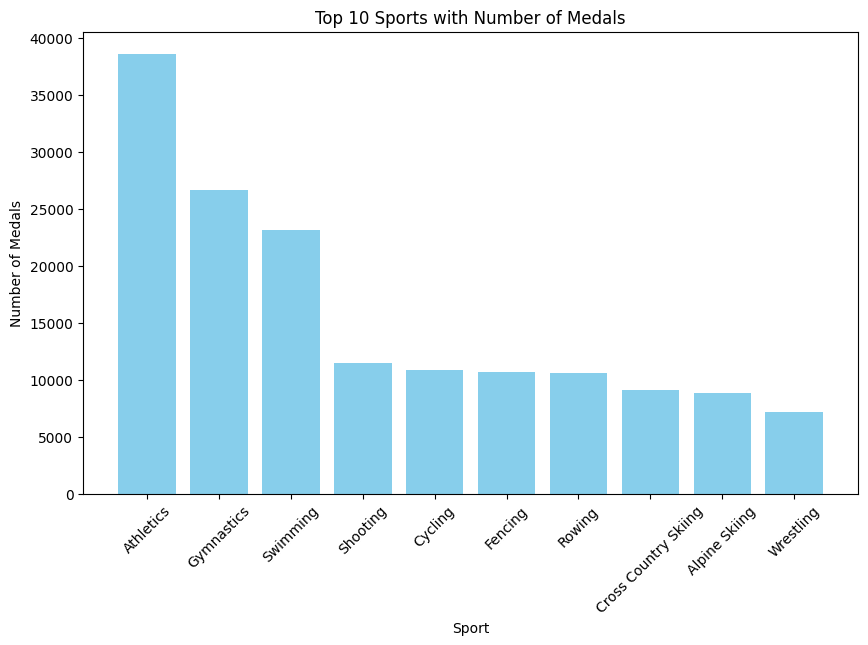

In [25]:
# Comparison of medal counts by Sport
medal_counts_by_sport=pd.pivot_table(df,index='Sport',values='Medal',aggfunc='count')
medal_counts_by_sport
medal_counts_by_sport_top10=medal_counts_by_sport.sort_values(by='Medal',ascending=False).head(10)
medal_counts_by_sport_top10

##ploting barchart
plt.figure(figsize=(10,6))
plt.bar(medal_counts_by_sport_top10.index,medal_counts_by_sport_top10['Medal'], color='skyblue')
plt.title('Top 10 Sports with Number of Medals')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()

6. Trends and Patterns Over Time

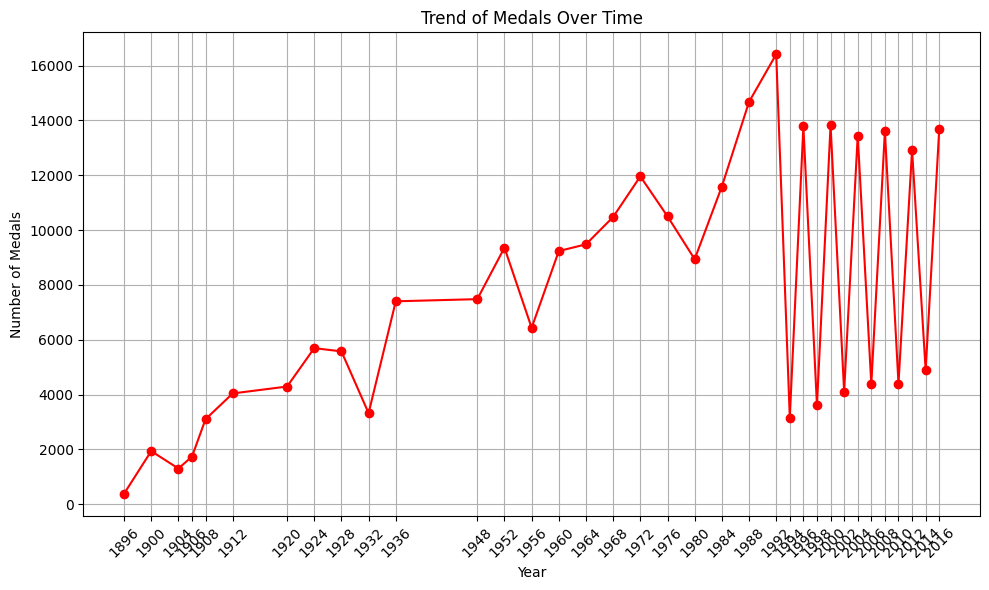

In [26]:
#Trend in number of medals over time
medals_by_year = df.groupby('Year')['Medal'].count()
medals_by_year
plt.figure(figsize=(10, 6))
plt.plot(medals_by_year.index, medals_by_year, marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Trend of Medals Over Time')
plt.grid(True)
plt.xticks(medals_by_year.index, rotation=45)
plt.tight_layout()
plt.show()




Correlation Matrix:
          Height    Weight
Height  1.000000  0.786609
Weight  0.786609  1.000000


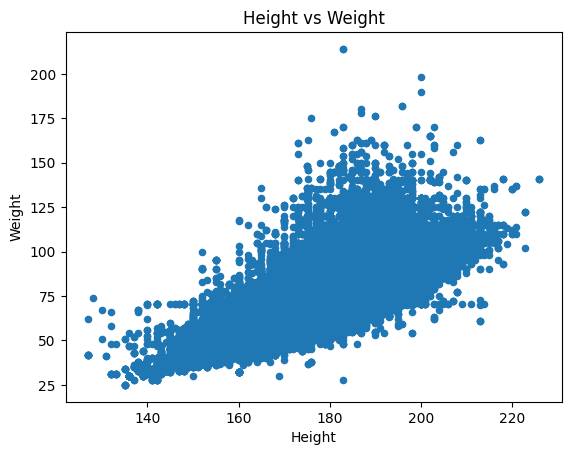

In [27]:
# Correlation Analysis
print("\nCorrelation Matrix:")
print(df[['Height', 'Weight']].corr())

df.plot.scatter(x='Height', y='Weight')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

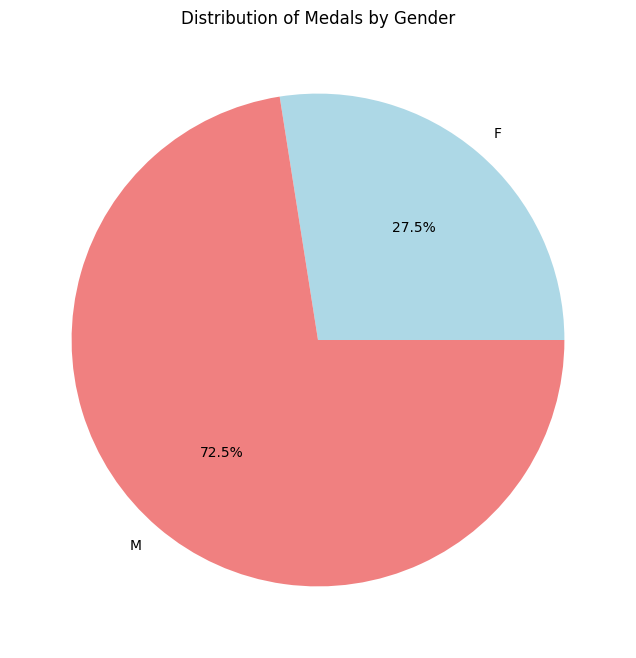

In [28]:
#distribution of medals between male and female athletes

# Aggregate medal counts by gender
medals_by_gender = df.groupby('Sex')['Medal'].count()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(medals_by_gender, labels=medals_by_gender.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Medals by Gender')
plt.show()

<ipython-input-31-bff269ccc4db>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medals_by_age_group = df.groupby('Age_Group')['Medal'].count()


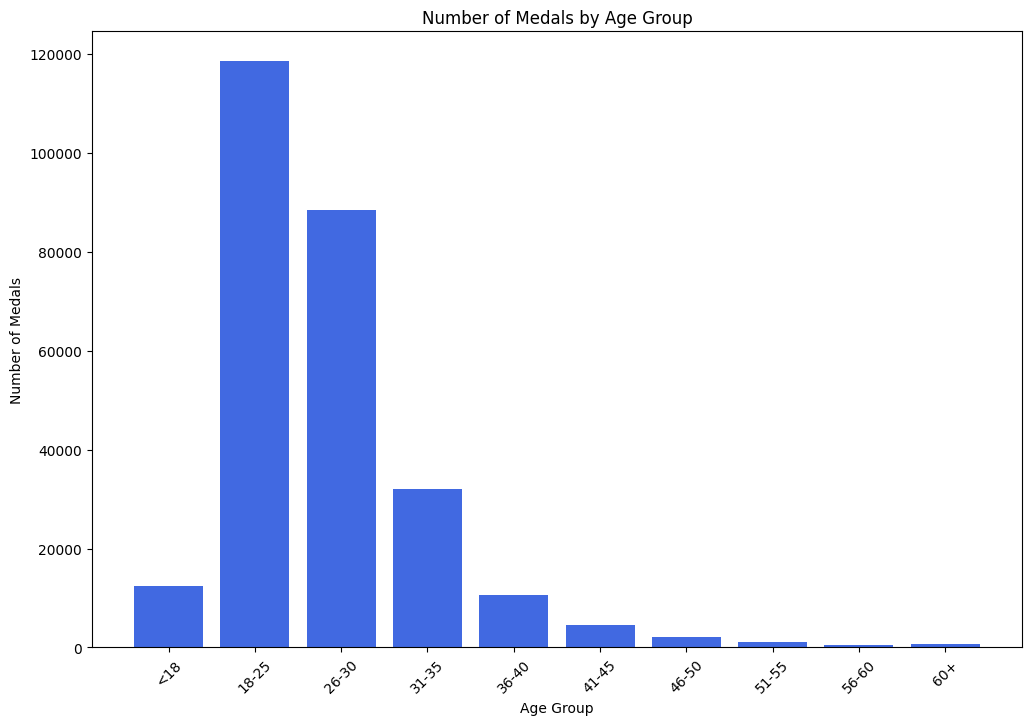

In [31]:
# Define age groups
bins = [0, 18, 25, 30, 35, 40, 45, 50, 55, 60, 100]  # Define age bins
labels = ['<18', '18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '60+']  # Define labels

# Create a new column for age groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Aggregate medal counts by age group
medals_by_age_group = df.groupby('Age_Group')['Medal'].count()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(medals_by_age_group.index, medals_by_age_group, color='royalblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Medals')
plt.title('Number of Medals by Age Group')
plt.xticks(rotation=45)
plt.show()